<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 

Author: [Yury Kashnitsky](https://yorko.github.io). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center> Topic 2. Visual data analysis
## <center>Practice. Analyzing "Titanic" passengers

**Fill in the missing code ("You code here"). No need to select answers in a webform.**

**<a href="https://www.kaggle.com/c/titanic">Competition</a> Kaggle "Titanic: Machine Learning from Disaster".**

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()
import matplotlib.pyplot as plt

**Read data**

In [4]:
train_df = pd.read_csv("../../data/titanic_train.csv", index_col="PassengerId")

In [5]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.describe(include="all")

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


**Let's drop`Cabin`, and then – all rows with missing values.**

In [8]:
train_df = train_df.drop("Cabin", axis=1).dropna()

In [9]:
train_df.shape

(712, 10)

**1. Build a picture to visualize all scatter plots for each pair of features `Age`, `Fare`, `SibSp`, `Parch` and `Survived`. ( `scatter_matrix ` from Pandas or `pairplot` from Seaborn)**

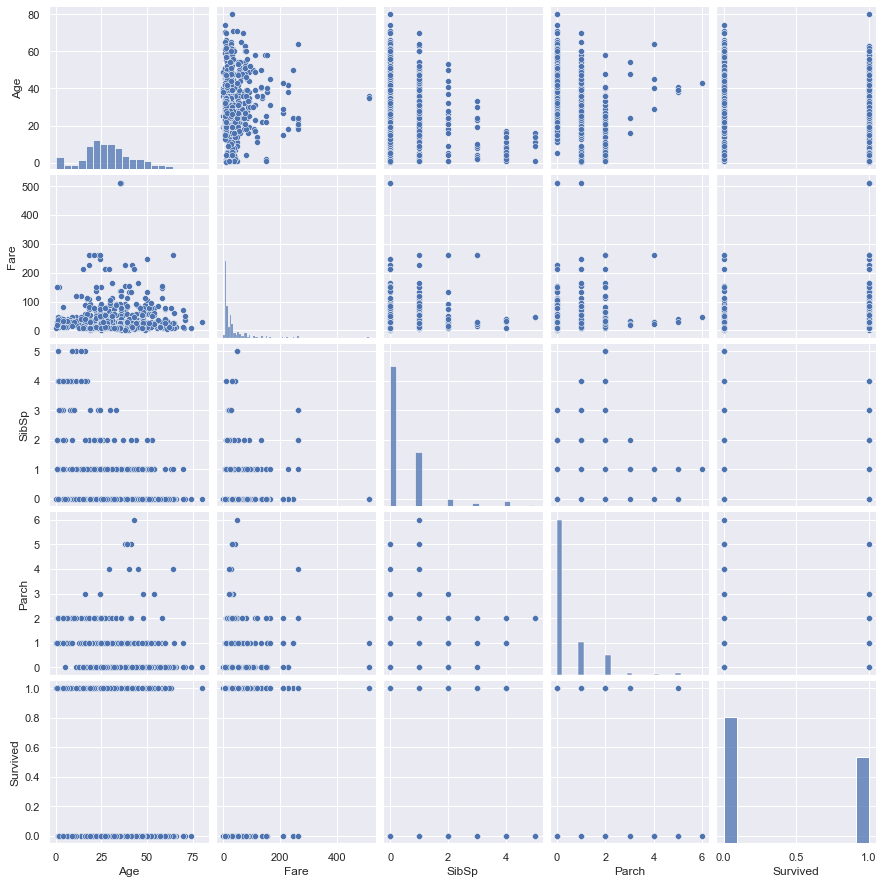

In [10]:
# You code here
pair_plot_list = ['Age', 'Fare', 'SibSp', 'Parch', 'Survived']
sns.pairplot(train_df[pair_plot_list])

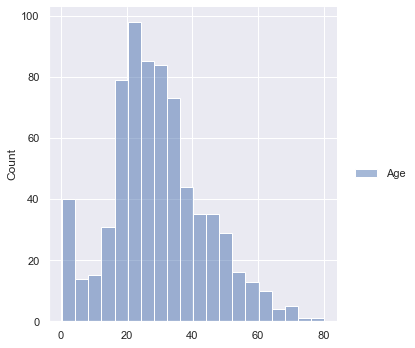

In [11]:
sns.displot(train_df[['Age']])

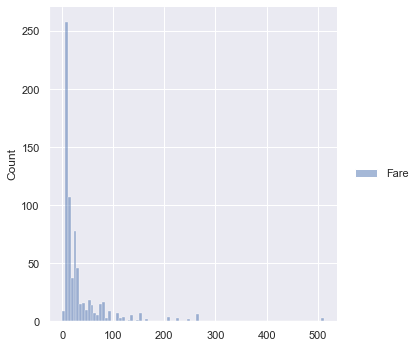

In [12]:
sns.displot(train_df[['Fare']])

**2. How does ticket price (`Fare`) depend on `Pclass`? Build a boxplot.**

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

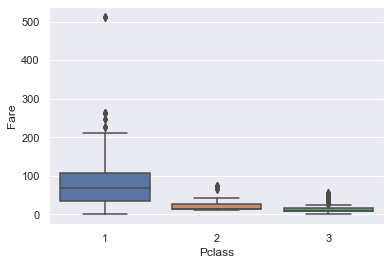

In [13]:
# You code here
sns.boxplot(x='Pclass', y='Fare', data=train_df)

**3. Let's build the same plot but restricting values of `Fare` to be less than 95% quantile of the initial vector (to drop outliers that make the plot less clear).**

In [14]:
print(train_df.quantile(.95))
print(type(train_df.quantile(.95)))

print('\n\n')
print(train_df['Fare'])
print(type(train_df['Fare']))
print(train_df['Fare'].quantile(.5))

Survived      1.0
Pclass        3.0
Age          56.0
SibSp         2.0
Parch         2.0
Fare        120.0
Name: 0.95, dtype: float64
<class 'pandas.core.series.Series'>



PassengerId
1       7.2500
2      71.2833
3       7.9250
4      53.1000
5       8.0500
        ...   
886    29.1250
887    13.0000
888    30.0000
890    30.0000
891     7.7500
Name: Fare, Length: 712, dtype: float64
<class 'pandas.core.series.Series'>
15.64585


<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

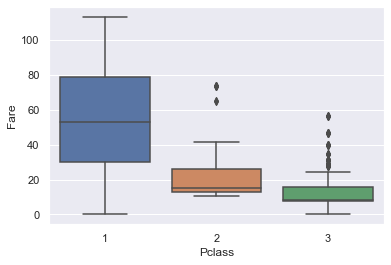

In [15]:
# You code here

# Fare under .95 quantile
condition1 = train_df['Fare'] < train_df['Fare'].quantile(.95)
df_temp = train_df[condition1]

sns.boxplot(
    x='Pclass', 
    y='Fare', 
    data=df_temp)

**4. How is the percentage of surviving passengers dependent on passengers' gender? Depict it with `Seaborn.countplot` using the `hue` argument.**

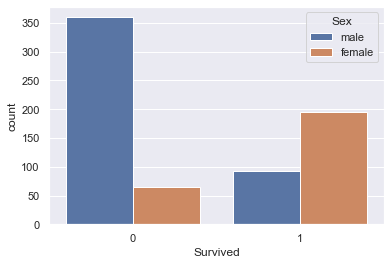

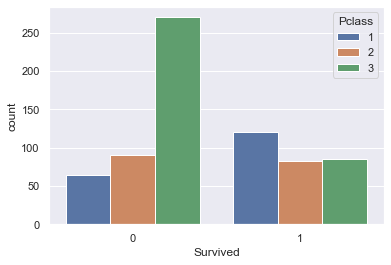

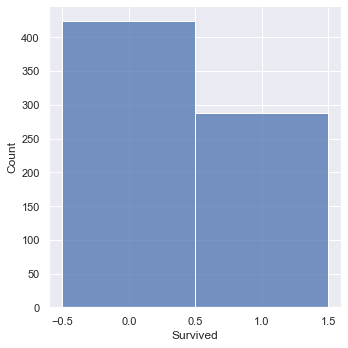

In [17]:
# You code here
# sns.countplot(x='Survived', data=train_df)
sns.countplot(x='Survived', hue='Sex', data=train_df)
plt.show()

sns.countplot(x='Survived', hue='Pclass', data=train_df)
plt.show()

# does the same kind of graph
sns.displot(data=train_df['Survived'], discrete=True)
plt.show()

**5. How does the distribution of ticket prices differ for those who survived and those who didn't. Depict it with `Seaborn.boxplot`**

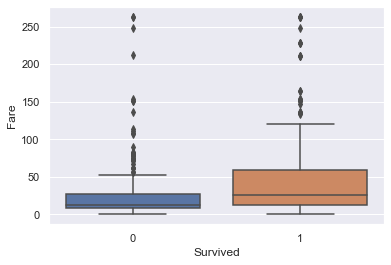

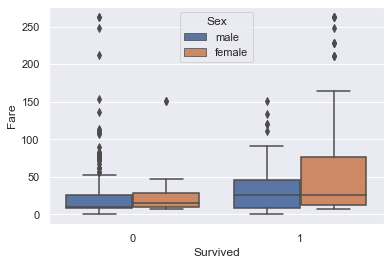

In [22]:
# You code here

# sns.boxplot(x='Survived', y='Fare', data=train_df)

# did this, cause otherwise the outlier value, makes the boxplot less visually understandable 
sns.boxplot(x='Survived', y='Fare', data=train_df[train_df['Fare'] < 500])
plt.show()
sns.boxplot(x='Survived', y='Fare', hue='Sex', data=train_df[train_df['Fare'] < 500])
plt.show()

**6. How does survival depend on passengers' age?  Verify (graphically) an assumption that youngsters (< 30 y.o.) survived more frequently than old people (> 55 y.o.).**

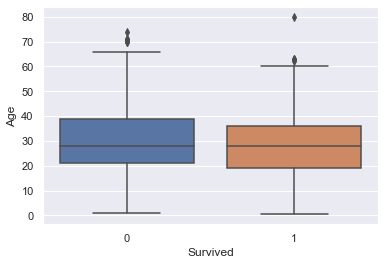

In [24]:
# You code here
sns.boxplot(x='Survived', y='Age', data=train_df)
plt.show()

# not working


## Useful resources
* The same notebook as an interactive web-based [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-2-practice-visualization) with a [solution](https://www.kaggle.com/kashnitsky/topic-2-practice-solution)
* Topic 2 "Visual data analysis in Python" as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-2-visual-data-analysis-in-python)
* Main course [site](https://mlcourse.ai), [course repo](https://github.com/Yorko/mlcourse.ai), and YouTube [channel](https://www.youtube.com/watch?v=QKTuw4PNOsU&list=PLVlY_7IJCMJeRfZ68eVfEcu-UcN9BbwiX)